# PFDA Project

### by E. Qejvani
***

## Part 1 - Preparing the dataset.
***

* Uploading the libraries.
* Keeping the information we are interested in.
* Preparing the dataset for analyzing.
    - Checking data types of the coulumns.
    - Checking for empty value cells or NaN value cells.
    - Cleaning the dataset.

In [1]:
# Importing the libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import matplotlib.patches as patches
import matplotlib.ticker as ticker
from scipy.stats import linregress
# Importing project_functions file where I'm storing all the functions to use in this project. 
from working_with_df_functions import *  
from calculation_functions import *       

In [2]:
# Uploading the dataset to my data frame, skipping the first 23 rows as the dataset starts at row 24. 
# Setting low_memory=False - easier to upload in big datasets.
df = pd.read_csv('./data/data_valentia_updated.csv', skiprows=23, low_memory=False)

# Creating a subset using only the data I need for this project.
# Two ways of doing it:
df_valentia = df[['date', 'rain', 'temp', 'vappr', 'msl', 'wdsp', 'wddir']].copy() # easier
# or:
# df_valentia = df.drop(columns=['ww', 'sun', 'w', 'vis', 'clht', 'clamt', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4']) 

df_valentia.head(5)

,date,rain,temp,vappr,msl,wdsp,wddir
0,01-jan-1945 00:00,0.0,8.9,11.3,1037.2,3,350
1,01-jan-1945 01:00,0.0,8.5,10.8,1037.2,2,360
2,01-jan-1945 02:00,0.0,8.8,10.6,1037.3,6,10
3,01-jan-1945 03:00,0.0,8.9,10.6,1037.5,9,350
4,01-jan-1945 04:00,0.0,9.3,10.8,1037.6,9,350


### Checking the dataset.

In [3]:
# Information about our dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701280 entries, 0 to 701279
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    701280 non-null  object
 1   rain    701280 non-null  object
 2   temp    701280 non-null  object
 3   vappr   701280 non-null  object
 4   msl     701280 non-null  object
 5   wdsp    701280 non-null  object
 6   wddir   701280 non-null  object
dtypes: object(7)
memory usage: 37.5+ MB


### Changing the data types in my dataset.

As we can see from the above all data types in the dataset are object type. To change this I am going to:
- Change the date column type to date type data.
- Change the rest of the columns to float type data. 
- I’m converting the data type of my columns to `float32` to reduce memory usage, as my dataset is quite large.
- I’m creating a function for these changes in the `project_functions.py` file, which will also serve as a repository for all the functions used in my project.
- I am setting the `date` column as the index to make it easier to work with the data based on time, like sorting or grouping by dates.

In [4]:
# Columns_to_convert will pass to `convert_columns_to_float` function all columns that need to change to numeric data.  
columns_to_convert = ['rain', 'temp', 'vappr', 'msl', 'wdsp', 'wddir']
df_valentia = convert_columns_to_float(df_valentia, columns_to_convert)
df_valentia['date'] = pd.to_datetime(df_valentia['date'], format="%d-%b-%Y %H:%M", errors='coerce')
# Setting the date as index
df_valentia.set_index('date', inplace=True)

In [5]:
# With the `.info` command I am checking that the changes took effect.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701280 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    701238 non-null  float32
 1   temp    701220 non-null  float32
 2   vappr   701220 non-null  float32
 3   msl     701220 non-null  float32
 4   wdsp    701235 non-null  float32
 5   wddir   701171 non-null  float32
dtypes: float32(6)
memory usage: 21.4 MB


In [6]:
# Displaying the first three rows to check the structure and columns again in my dataset.
df_valentia.head(3)

,rain,temp,vappr,msl,wdsp,wddir
date,,,,,,
1945-01-01 00:00:00,0.0,8.9,11.3,1037.199951,3.0,350.0
1945-01-01 01:00:00,0.0,8.5,10.8,1037.199951,2.0,360.0
1945-01-01 02:00:00,0.0,8.8,10.6,1037.300049,6.0,10.0


### Checking for missing data, NaN values and single space values `' '`

In Assignment Six of this module, I found out that using `.isna()` and `.isnull()` alone is insufficient for cleaning the dataset. Sometimes, cells can contain an empty value represented by a single space (stored as a string). Therefore, in the next section, I will check for any cells that contain a single space as their value.

### Counting the rows that hold empty cells.

* I created a function named `count_rows_with_empty_or_space_cells_detail` in the `project_functions` file that counts all the rows that hold empty cells. 

In [7]:
# Calling the funtion from the 'project_functions.py' file.
count_rows_with_empty_or_space_cells_detail(df_valentia)

Rows with 0 empty cells: 701104
Rows with 1 empty cells: 75
Rows with 2 empty cells: 41
Rows with 3 empty cells: 22
Rows with 4 empty cells: 37
Rows with 5 empty cells: 1
Total rows with at least one empty values: 176


176

### Cleaning the rows with empty cells.

* Because of the big size of the dataset (709320 records) I decided to remove all the rows that contain empty cells.
* The function `remove_rows_with_missing_data` called below drops all the rows containing empty cells.
* The total records after removing 176 rows becomes 709144.

In [8]:
# Calling remove_rows_with_missing_data function to clean/drop all the rows with empty cells.
df_valentia = remove_rows_with_missing_data(df_valentia)
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701104 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    701104 non-null  float32
 1   temp    701104 non-null  float32
 2   vappr   701104 non-null  float32
 3   msl     701104 non-null  float32
 4   wdsp    701104 non-null  float32
 5   wddir   701104 non-null  float32
dtypes: float32(6)
memory usage: 21.4 MB


### Converting wind speed to metres per second.

To convert the wind speed (wdsp) from knots to metres per second, I will use the conversion factor of 1 knot = 0.51444 metres/second. In the dataset, wind speed is currently measured in knots, representing the speed of the wind in nautical miles per hour. For my analysis, I need the wind speed expressed in metres per second. To achieve this, I will create a new column in the df_valentia dataset to store the wind speed values converted to metres per second.

In [9]:
# Create a new column with the windspeed in metre/second
df_valentia['wdsp_m/s'] = (df_valentia['wdsp'] * 0.51444).round(2)

In [10]:
df_valentia.head()

,rain,temp,vappr,msl,wdsp,wddir,wdsp_m/s
date,,,,,,,
1945-01-01 00:00:00,0.0,8.9,11.3,1037.199951,3.0,350.0,1.54
1945-01-01 01:00:00,0.0,8.5,10.8,1037.199951,2.0,360.0,1.03
1945-01-01 02:00:00,0.0,8.8,10.6,1037.300049,6.0,10.0,3.09
1945-01-01 03:00:00,0.0,8.9,10.6,1037.500000,9.0,350.0,4.63
1945-01-01 04:00:00,0.0,9.3,10.8,1037.599976,9.0,350.0,4.63


In [11]:
# I don't need any more the wind speed column in knot so I am removing it from the dataset.
df_valentia = df_valentia.drop(columns=['wdsp'])
df_valentia.head()

,rain,temp,vappr,msl,wddir,wdsp_m/s
date,,,,,,
1945-01-01 00:00:00,0.0,8.9,11.3,1037.199951,350.0,1.54
1945-01-01 01:00:00,0.0,8.5,10.8,1037.199951,360.0,1.03
1945-01-01 02:00:00,0.0,8.8,10.6,1037.300049,10.0,3.09
1945-01-01 03:00:00,0.0,8.9,10.6,1037.500000,350.0,4.63
1945-01-01 04:00:00,0.0,9.3,10.8,1037.599976,350.0,4.63


In [12]:
df_valentia.info()
df_valentia.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701104 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rain      701104 non-null  float32
 1   temp      701104 non-null  float32
 2   vappr     701104 non-null  float32
 3   msl       701104 non-null  float32
 4   wddir     701104 non-null  float32
 5   wdsp_m/s  701104 non-null  float32
dtypes: float32(6)
memory usage: 21.4 MB


Index(['rain', 'temp', 'vappr', 'msl', 'wddir', 'wdsp_m/s'], dtype='object')

***
## Part 2: Analysing Data
***

### Correlation between wind speed and other data

In the next part I am checking if there is any correlation between the windspeed and the other data in the dataset using a heatmap.

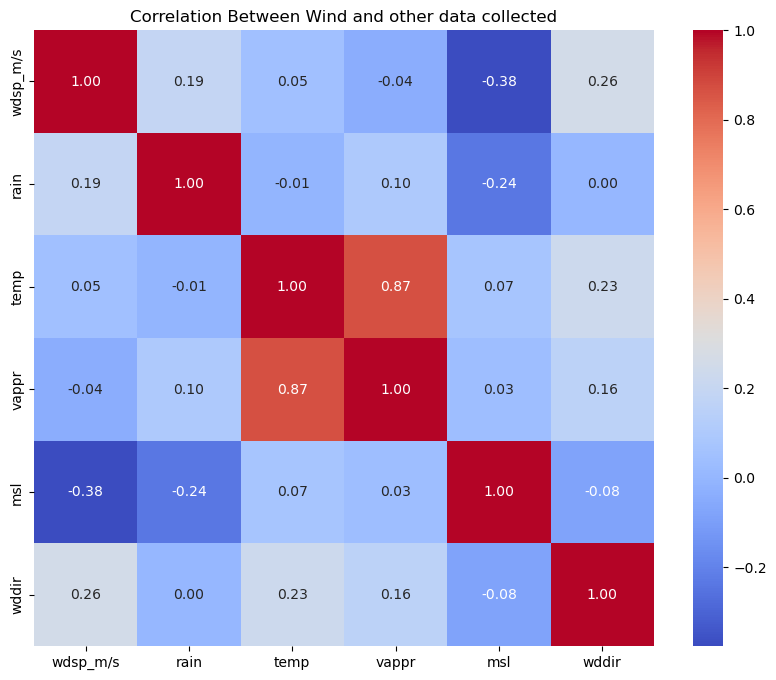

In [13]:
# Selecting columns to for correlation analysis between wind and other information we have.
selected_columns = ['wdsp_m/s','rain', 'temp', 'vappr', 'msl', 'wddir']
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Wind and other data collected')
plt.show()

### Deciding on which data to keep:

As we can see from the above, there is no direct connection between wind speed and the other data we currently have. 

In the next section, I will:

1. **Calculate the air density** and add it as a new column. The required data for this calculation includes:
   - Temperature (`temp`)
   - Vapour pressure (`vappr`)
   - Mean sea level pressure (`msl`)

2. **Calculate the power output** and add it as a new column. The required data for this calculation includes:
   - Air density (`air_density`)
   - Wind speed (`wdsp_m/s`)
   - Rotor swept area - calculated for a common wind turbine size with a diameter of 100 meters.
   - Power coefficient - typically ranging between 0.3 and 0.5. For this analysis, I used a value of 0.4.

3. **Remove unnecessary columns**, including:
   - Wind direction (`wddir`): While wind direction is crucial for energy output, modern wind turbines address this factor automatically. Their blades adjust dynamically to optimize wind capture regardless of direction, making this data redundant for my calculations.

**Important**

_To make my code more efficient, I'm using a single function, `add_new_column`, to handle both air density and power energy calculations. The function determines which calculating function based on the parameters passed and adds the appropriate new column to the dataset._
***

### Calculating Air Density

To calculate the air density using the data available in my dataset I used the general air density formula derived from the _Ideal Gas Law_ for both dry air and water vapor: 

$$
\rho = \frac{p_d}{R_d T} + \frac{p_v}{R_v T}
$$

Where:

- $ \rho $: Air density in $ \text{kg/m}^3 $
- $ p_d $: Dry air pressure, calculated as $ p_d = \text{msl} - \text{vappr} $ (Pa)
- $ p_v $: Vapor pressure ($ \text{vappr} $) in Pascals (Pa)
- $ T $: Temperature in Kelvin (K), converted as:

  $$
  T_{\text{Kelvin}} = T_{\text{Celsius}} + 273.15
  $$

- $ R_d $: Specific gas constant for dry air (287.05 J/(kg·K))
- $ R_v $: Specific gas constant for water vapor (461.5 J/(kg·K))


Functions used:
- `calculate_air_density`
- `add_new_column`

In [14]:
# Making changes to the dataset by adding a new column
df_valentia = add_new_column(df_valentia, column='air_density')
# Checking if it works
df_valentia.head(5)

,rain,wddir,wdsp_m/s,air_density
date,,,,
1945-01-01 00:00:00,0.0,350.0,1.54,1.275812
1945-01-01 01:00:00,0.0,360.0,1.03,1.277857
1945-01-01 02:00:00,0.0,10.0,3.09,1.276715
1945-01-01 03:00:00,0.0,350.0,4.63,1.276509
1945-01-01 04:00:00,0.0,350.0,4.63,1.274731


In [15]:
# Checking the air density values: range, mean, std etc...
# Get summary statistics for the column
df_valentia['air_density'].describe()

count    701104.000000
mean          1.238742
std           0.023298
min           1.149262
25%           1.222173
50%           1.236371
75%           1.253356
max           1.347003
Name: air_density, dtype: float64

***
### Calculating energy power

The Sustainable Energy Authority of Ireland (SEAI) notes that in recent years, rotor diameters of 100 meters or more at hub heights exceeding 100 meters are common.
For this project I am going to calculate the output power using the diameter as 100m for my calculations and Power Coefficient(Efficiency) of 0.4.

The wind power equation is expressed as follows:

$$
P = 0.5 \times \rho \times A \times V^3 \times E
$$

Where:
- **P** = Power in Watts  
- **$\rho$** = Air Density in kg/m³ (about 1.225 kg/m³ at sea level, decreases with altitude)  
- **A** = Rotor Swept Area in m² = $\pi r^2$ (where $r$ = radius or blade length)  
- **V** = Wind Speed in m/s (cubed)  
- **E** = Efficiency (Power Coefficient, typically between 0.3 and 0.5)

Functions used:
- `calculate_power_for_row`
- `add_new_column`

In [16]:
# Making changes to the dataset by adding a new column 'power_output' 
df_valentia = add_new_column(df_valentia, column='power_kw')
# Checking if it works
df_valentia.head(5)

,rain,wdsp_m/s,air_density,power_kw
date,,,,
1945-01-01 00:00:00,0.0,1.54,1.275812,0.00
1945-01-01 01:00:00,0.0,1.03,1.277857,0.00
1945-01-01 02:00:00,0.0,3.09,1.276715,0.00
1945-01-01 03:00:00,0.0,4.63,1.276509,199.02
1945-01-01 04:00:00,0.0,4.63,1.274731,198.74


***
### Checking the Correlation between the remaining data in df_valentia 

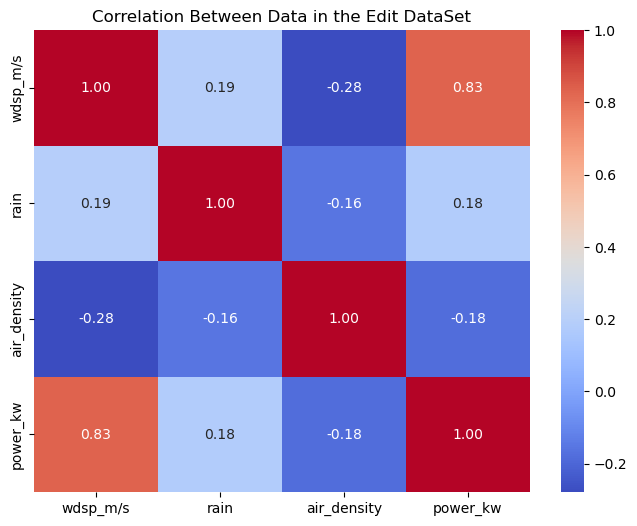

In [17]:
# Selecting columns to for correlation between the data in the df_valentia DataFrame
selected_columns = ['wdsp_m/s','rain', 'air_density', 'power_kw' ]
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Data in the Edit DataSet')
plt.show()

## More Analysis and Changes of DataFrame.

### Calculation how many hours per day the wind speed is between 4m/s(cut-in speed for the turbines to start working) to 25m/s(cut-out speed).

In the next code section I am checking if the wind speed (`wdsp_m/s`) in my DataFrame (df_valentia) is within the range [4, 25] and creating a new Boolean column, `in_range`, to show if the condition is met (`True` or `False`). Next the code is converting these Boolean values into integers (`1` for `True` and `0` for `False`) and stores them in another column, `hours_in_range`, which we can use for analysis later on.

To make code more efficient I updated the `add_new_column` function for this step.

In [18]:
df_valentia = add_new_column(df_valentia, 'in_range')
df_valentia = add_new_column(df_valentia, 'hours_in_range')
df_valentia

,rain,wdsp_m/s,air_density,power_kw,in_range,hours_in_range
date,,,,,,
1945-01-01 00:00:00,0.0,1.54,1.275812,0.00,False,0
1945-01-01 01:00:00,0.0,1.03,1.277857,0.00,False,0
1945-01-01 02:00:00,0.0,3.09,1.276715,0.00,False,0
1945-01-01 03:00:00,0.0,4.63,1.276509,199.02,True,1
1945-01-01 04:00:00,0.0,4.63,1.274731,198.74,True,1
...,...,...,...,...,...,...
2024-12-31 20:00:00,1.6,4.63,1.239285,193.21,True,1
2024-12-31 21:00:00,3.0,2.06,1.238950,0.00,False,0
2024-12-31 22:00:00,2.8,3.60,1.240481,0.00,False,0


### Using .describe command to get statistics about data in the dataset and I will graph the results:

In [19]:
summary_stats = df_valentia[['rain', 'wdsp_m/s', 'air_density', 'power_kw']].describe()
summary_stats

,rain,wdsp_m/s,air_density,power_kw
count,701104.000000,701104.000000,701104.000000,701104.000000
mean,0.173074,5.203486,1.238742,596.675886
std,0.625499,3.146793,0.023298,1069.773558
min,0.000000,0.000000,1.149262,0.000000
25%,0.000000,3.090000,1.222173,0.000000
50%,0.000000,5.140000,1.236371,257.270000
75%,0.000000,7.200000,1.253356,719.472500
max,36.200001,29.840000,1.347003,28606.730000


### Plotting summary statistics with log scale for y-axis

The _power output_ value is too big comparing to other data in the dataset so I am using log scale measuring for y-axis.

<Figure size 600x400 with 0 Axes>

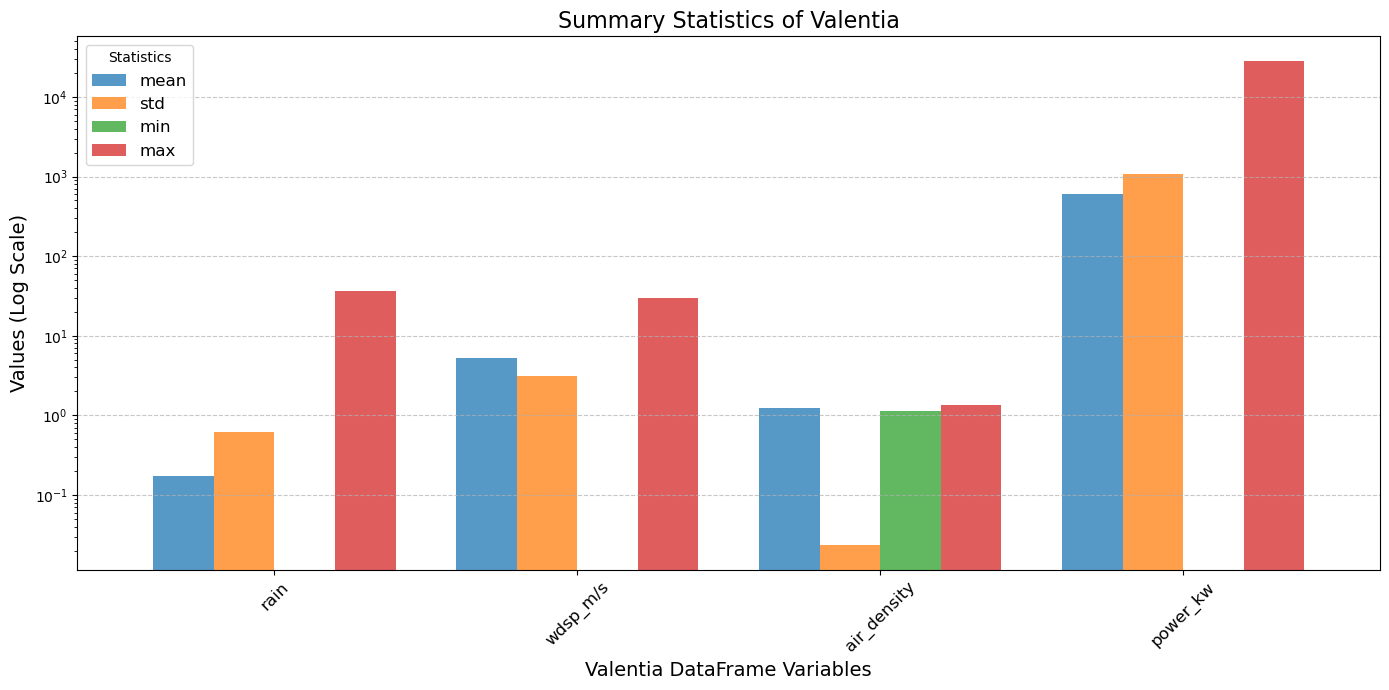

In [20]:
# Transpose for easier plotting (columns become rows)
summary_stats = summary_stats.transpose()

# Set figure size.
plt.figure(figsize=(6, 4))

# Bar plot for mean, min, max
summary_stats[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(14, 7), width=0.8, alpha=0.75)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Adding labels and title
plt.title('Summary Statistics of Valentia', fontsize=16)
plt.ylabel('Values (Log Scale)', fontsize=14)
plt.xlabel('Valentia DataFrame Variables', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Statistics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

***
### Analysis of Wind Speed & Power Output by Season
***

In [21]:
# Extract additional time-based features from the index (date is set as DataFrame index)
df_valentia = df_valentia.copy()
df_valentia.loc[:, 'year'] = df_valentia.index.year                     # Extract year.
df_valentia.loc[:, 'month'] = df_valentia.index.month                   # Extract month.
df_valentia.loc[:, 'season'] = df_valentia.index.month % 12 // 3 + 1    # Extract season.

In [22]:
# Creating a new column 'season_label' in the DataFrame referring to 'month' 
# by calling 'get_season' function in the 'project_functions.py' file.
df_valentia['season_label'] = df_valentia['month'].apply(get_season)

# Group data by season and calculate averages for our numerical data.
seasonal_averages = df_valentia.groupby('season_label').mean()

# Print the 'mean' values of our numeric data.
print(seasonal_averages[['rain', 'wdsp_m/s', 'air_density', 'power_kw']])

                  rain  wdsp_m/s  air_density    power_kw
season_label                                             
Autumn        0.181877  4.767695     1.225643  447.711800
Spring        0.155960  5.545879     1.251312  709.753712
Summer        0.124456  4.538001     1.229646  356.602115
Winter        0.229481  5.972554     1.248745  875.996342


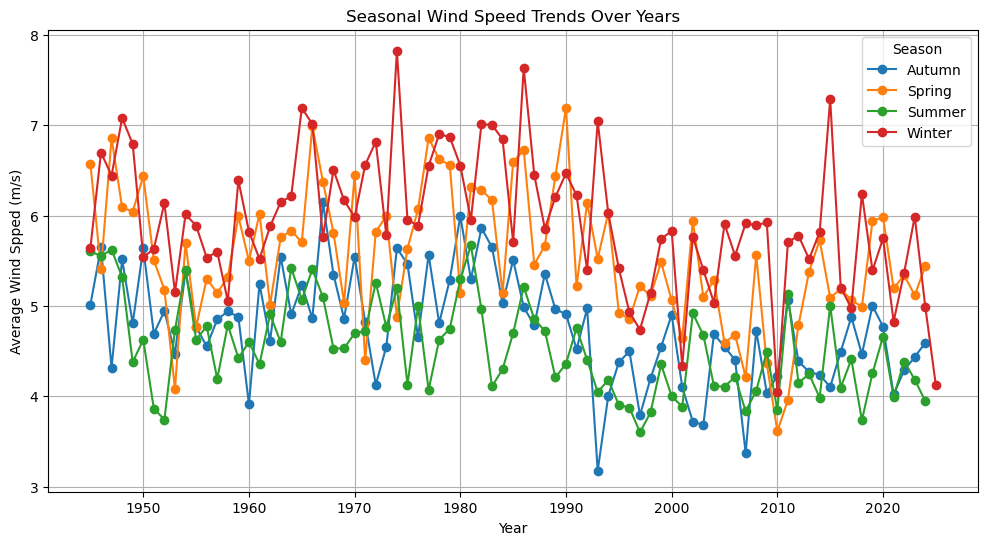

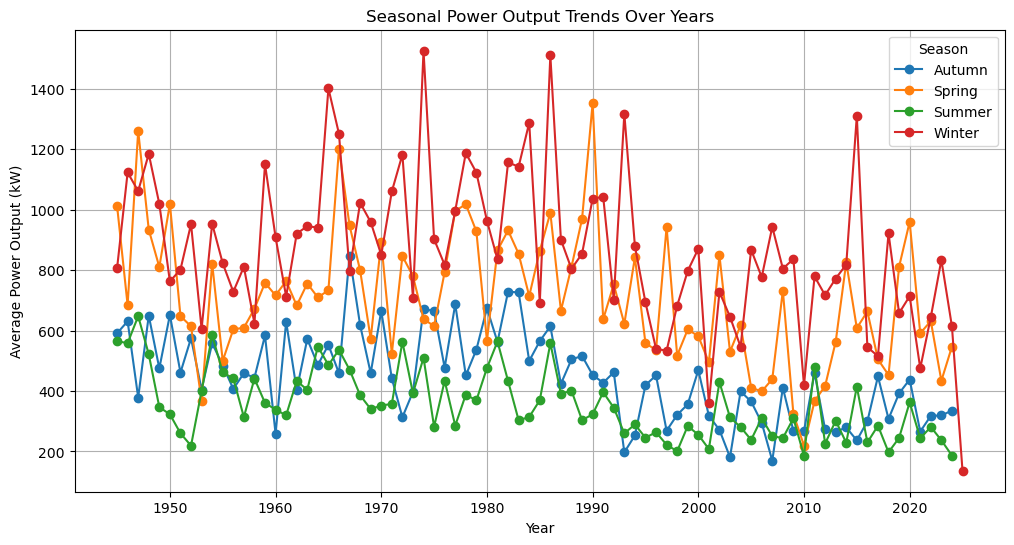

In [23]:
# Group power output by season and year
seasonal_trends_wdsp = df_valentia.groupby(['year', 'season_label'])['wdsp_m/s'].mean().unstack()
seasonal_trends_power = df_valentia.groupby(['year', 'season_label'])['power_kw'].mean().unstack()

# Setting colors for the seasons
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  #blue, orange, green, red

# Plot data for the seasons.
seasonal_trends_wdsp.plot(figsize=(12, 6), marker='o')
plt.title('Seasonal Wind Speed Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Wind Spped (m/s)')
plt.legend(title='Season')
plt.grid()
plt.show()

# Plot data for the seasons.
seasonal_trends_power.plot(figsize=(12, 6), marker='o', color=colors)
plt.title('Seasonal Power Output Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Power Output (kW)')
plt.legend(title='Season')
plt.grid()
plt.show()

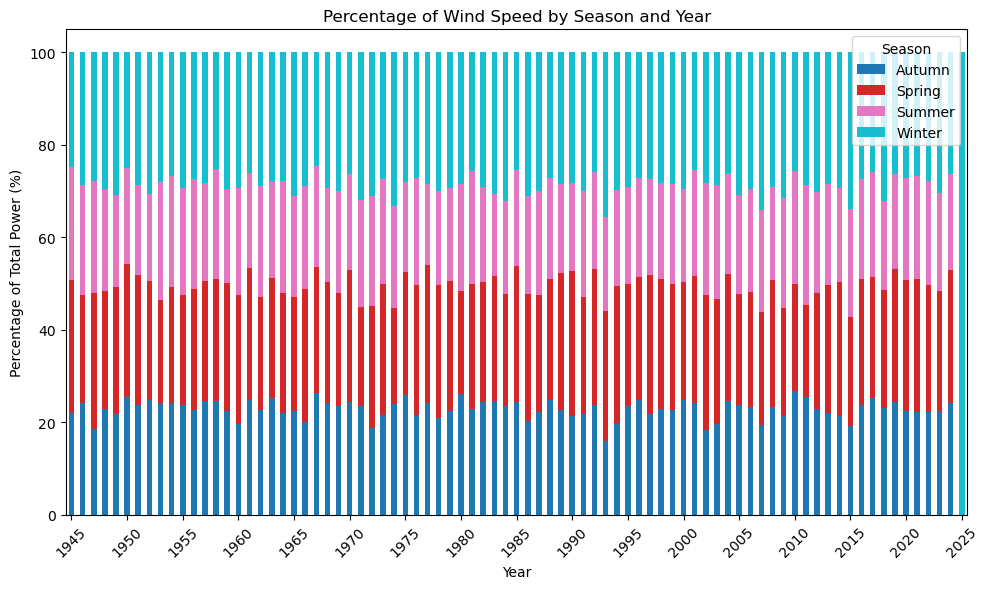

In [24]:
# Calculating the total wind speed for each year
total_wdsp_by_year = seasonal_trends_wdsp.sum(axis=1)

# Calculating the percentage of power production for each season
percentage_wind_by_season = seasonal_trends_wdsp.div(total_wdsp_by_year, axis=0) * 100

# Plotting the data
ax = percentage_wind_by_season.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab10')
ax.set_title('Percentage of Wind Speed by Season and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Total Power (%)')
ax.legend(title='Season')

# Customize x-axis to display every 5th year
years = percentage_wind_by_season.index
tick_positions = range(0, len(years), 5)  # Every 5th year
tick_labels = years[tick_positions]  # Corresponding year labels

# Set x-axis ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)

plt.tight_layout()
plt.show()

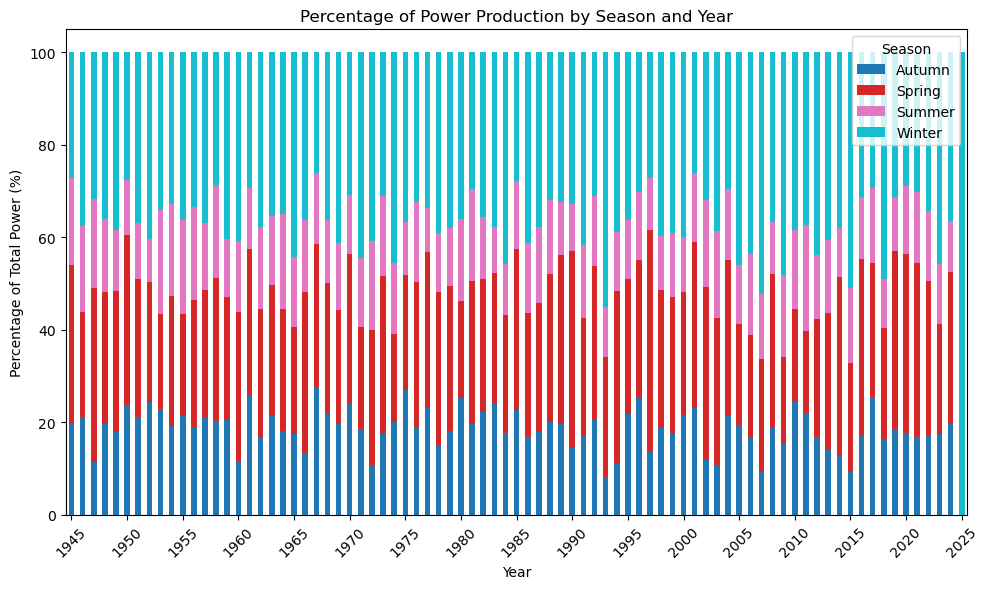

In [25]:
# Calculating the total power production for each year
total_power_by_year = seasonal_trends_power.sum(axis=1)

# Calculating the percentage of power production for each season
percentage_power_by_season = seasonal_trends_power.div(total_power_by_year, axis=0) * 100

# Plotting the data
ax = percentage_power_by_season.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab10')
ax.set_title('Percentage of Power Production by Season and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Total Power (%)')
ax.legend(title='Season')

# Customize x-axis to display every 5th year
years = percentage_power_by_season.index
tick_positions = range(0, len(years), 5)  # Every 5th year
tick_labels = years[tick_positions]  # Corresponding year labels

# Set x-axis ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)

plt.tight_layout()
plt.show()

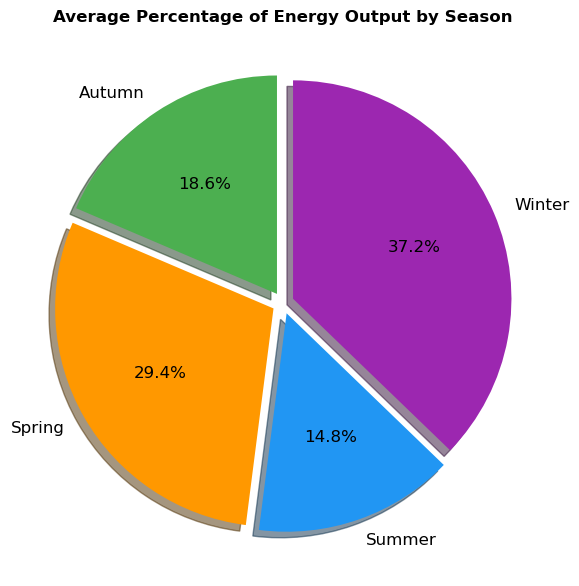

In [26]:
# Calculating the average percentage of each season
average_percentage_power_by_season = percentage_power_by_season.mean()

# Pie chart for energy output by season
colors = ['#4CAF50', '#FF9800', '#2196F3', '#9C27B0']  # Custom color palette
explode = [0.05] * len(average_percentage_power_by_season)  # Slightly explode all slices

plt.figure(figsize=(6, 6))  # Figure size.
plt.pie(
    average_percentage_power_by_season,  # Values for the pie chart
    labels=average_percentage_power_by_season.index,  # Season labels
    autopct='%1.1f%%',  # Show percentage values
    startangle=90,  # Rotate to start from the top
    colors=colors,  # Apply custom colors
    explode=explode,  # Slightly explode all slices
    shadow=True,  # Add shadow for a 3D effect
    textprops={'fontsize': 12}  # Adjust text size
)

# Add title
plt.title('Average Percentage of Energy Output by Season', fontsize=12, weight='bold')

# Improve layout
plt.tight_layout()
plt.show()

### Results:

**The highest amount of energy is produced in Winter, followed by Spring, Autumn and Summer**

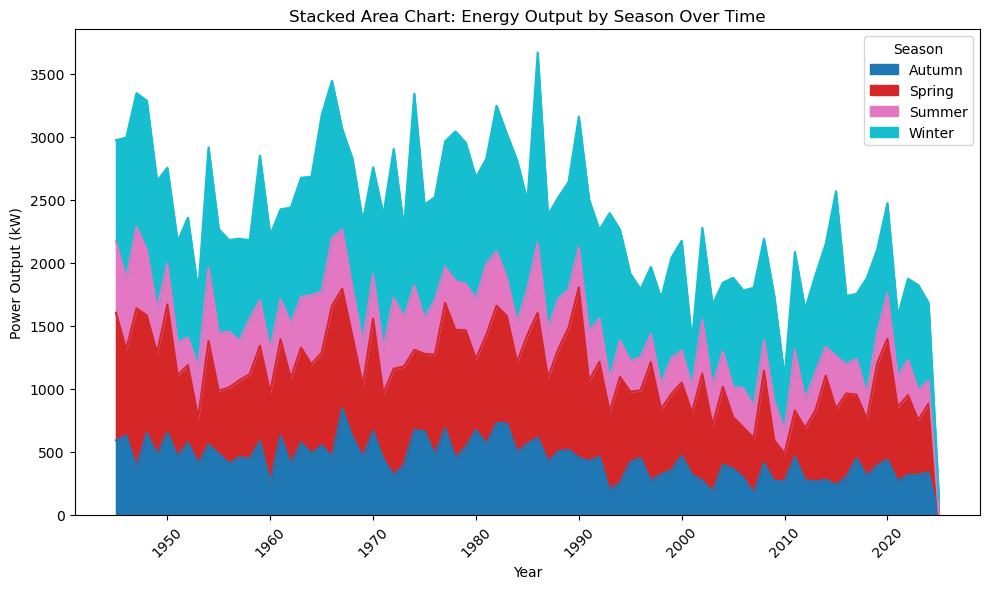

In [27]:
# Group by both year and season for seasonal trends over time
seasonal_trends_by_year = df_valentia.groupby(['year', 'season_label'])['power_kw'].mean().unstack()

ax = seasonal_trends_by_year.plot(kind='area', figsize=(10, 6), stacked=True, cmap='tab10')
ax.set_title('Stacked Area Chart: Energy Output by Season Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Power Output (kW)')
ax.legend(title='Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***
### Prediction for the next decades
***

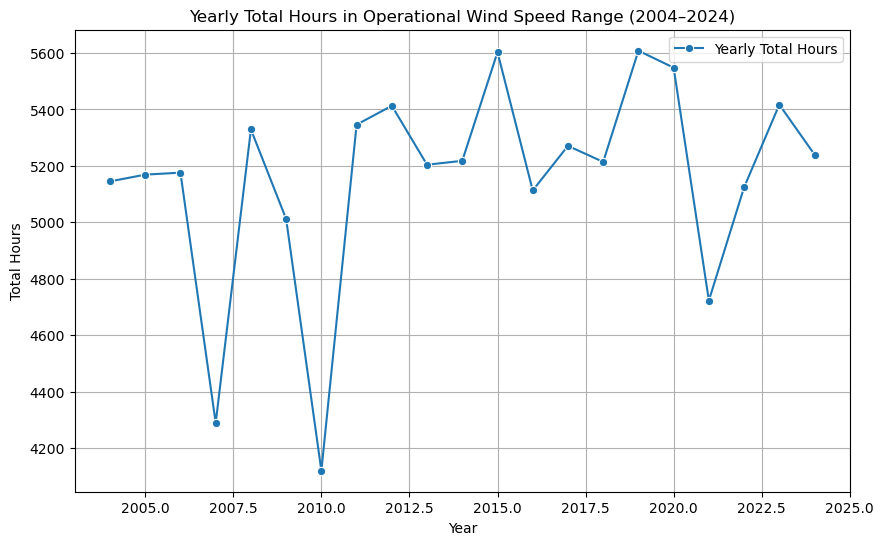

Linear Trend (2004–2024): Slope = 18.24 hours/year, Intercept = -31587.44
R-squared = 0.09, p-value = 1.85e-01


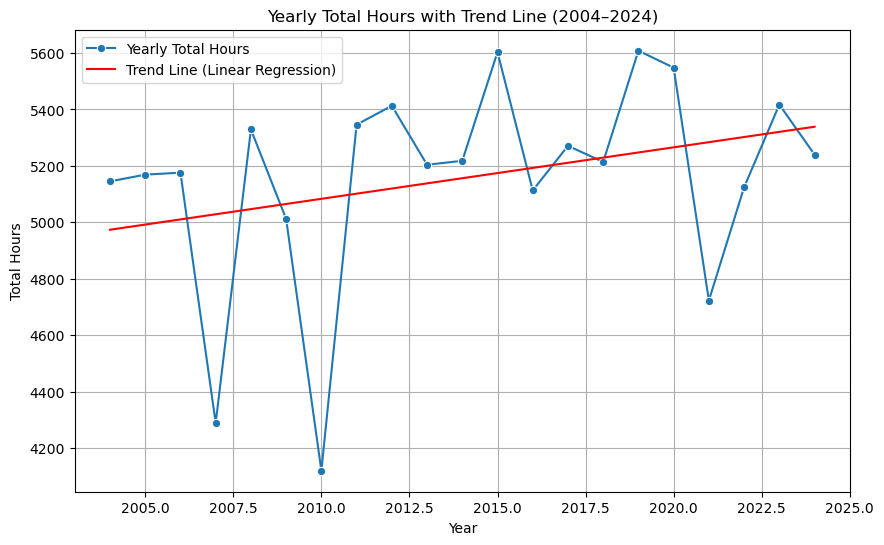

In [28]:
# Extract year for grouping
df_valentia['year'] = df_valentia.index.year

# Filter data for the past 20 years (2004–2024)
df_last_20_years = df_valentia.loc['2004-01-01':'2024-12-31']

# Group by year to calculate yearly totals
yearly_data_20_years = df_last_20_years.groupby('year')['hours_in_range'].sum()

# Plot yearly data for the last 20 years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_data_20_years.index, y=yearly_data_20_years.values, marker='o', label='Yearly Total Hours')
plt.title('Yearly Total Hours in Operational Wind Speed Range (2004–2024)')
plt.xlabel('Year')
plt.ylabel('Total Hours')
plt.grid(True)
plt.legend()
plt.show()

# Perform linear regression for the last 20 years
years = yearly_data_20_years.index
slope, intercept, r_value, p_value, std_err = linregress(years, yearly_data_20_years.values)

# Print regression details
print(f"Linear Trend (2004–2024): Slope = {slope:.2f} hours/year, Intercept = {intercept:.2f}")
print(f"R-squared = {r_value**2:.2f}, p-value = {p_value:.2e}")

# Plot with regression line for the last 20 years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_data_20_years.index, y=yearly_data_20_years.values, marker='o', label='Yearly Total Hours')
plt.plot(years, intercept + slope * years, 'r-', label='Trend Line (Linear Regression)')
plt.title('Yearly Total Hours with Trend Line (2004–2024)')
plt.xlabel('Year')
plt.ylabel('Total Hours')
plt.grid(True)
plt.legend()
plt.show()


***
### Making the code more efficient:

_Function re-write_ group by to used for both wind speed and power output.

In [29]:
def group_by_dataset(df, time='D', columns=['hours_in_range'], agg_func='sum'):
    if time == 'decade':
        # Create a temporary DataFrame with the 'decade' column
        df_temp = df.copy()  # Avoid modifying the original DataFrame
        df_temp['decade'] = (df_temp.index.year // 10) * 10
        # Group by decade and apply the aggregation function to the specified columns
        grouped_df = df_temp.groupby('decade')[columns].agg(agg_func)
    else:
        # For daily, weekly, monthly, or yearly grouping, resample and apply the aggregation function
        grouped_df = df.resample(time)[columns].agg(agg_func)
    
    return grouped_df


In [30]:
grouped_data = group_by_dataset(df_valentia, time='YE', columns=['rain','hours_in_range', 'power_kw'], agg_func='sum')
print(grouped_data)


                   rain  hours_in_range    power_kw
date                                               
1945-12-31  1442.900024            6147  6493595.70
1946-12-31  1549.599976            6275  6563813.50
1947-12-31  1505.400024            6085  7300472.84
1948-12-31  1475.199951            6393  7216109.86
1949-12-31  1322.800049            5996  5792067.76
...                 ...             ...         ...
2021-12-31  1548.300049            4723  3436238.63
2022-12-31  1678.699951            5124  4093423.49
2023-12-31  1944.599976            5417  3994959.77
2024-12-31  1650.300049            5240  3687446.57
2025-12-31     2.000000               1      136.44

[81 rows x 3 columns]
